In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
train.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1.0,55.0,1885.0,136.83,152.29,0.0,0.0,177.0
1,1466964,1.0,55.0,1993.0,136.83,135.83,0.0,0.0,270.0
2,1346989,1.0,55.0,2539.0,134.86,135.86,0.0,0.0,189.0
3,1338232,1.0,55.0,2139.0,339.50,437.53,0.0,0.0,54.0
4,1448490,1.0,55.0,2631.0,243.50,242.50,0.0,0.0,40.0


In [8]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25773 entries, 0 to 25772
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     25773 non-null  int64  
 1   week                   25772 non-null  float64
 2   center_id              25772 non-null  float64
 3   meal_id                25772 non-null  float64
 4   checkout_price         25772 non-null  float64
 5   base_price             25772 non-null  float64
 6   emailer_for_promotion  25772 non-null  float64
 7   homepage_featured      25772 non-null  float64
 8   num_orders             25772 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.8 MB


In [10]:
train['num_orders'].describe()

count    25772.000000
mean       290.926936
std        609.311700
min         13.000000
25%         54.000000
50%        136.000000
75%        325.000000
max      24299.000000
Name: num_orders, dtype: float64

In [11]:
train.isnull().sum()

id                       0
week                     1
center_id                1
meal_id                  1
checkout_price           1
base_price               1
emailer_for_promotion    1
homepage_featured        1
num_orders               1
dtype: int64

In [14]:
meal_info = pd.read_csv("meal_info.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")

trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal,center_info, on="center_id", how="outer")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Unnamed: 0_x,category,cuisine,Unnamed: 0_y,city_code,region_code,center_type,op_area
0,1379560.0,1.0,55.0,1885.0,136.83,152.29,0.0,0.0,177.0,NaN,Beverages,Thai,NaN,647.0,56.0,TYPE_C,2.0
1,1018704.0,2.0,55.0,1885.0,135.83,152.29,0.0,0.0,323.0,NaN,Beverages,Thai,NaN,647.0,56.0,TYPE_C,2.0
2,1196273.0,3.0,55.0,1885.0,132.92,133.92,0.0,0.0,96.0,NaN,Beverages,Thai,NaN,647.0,56.0,TYPE_C,2.0
3,1116527.0,4.0,55.0,1885.0,135.86,134.86,0.0,0.0,163.0,NaN,Beverages,Thai,NaN,647.0,56.0,TYPE_C,2.0
4,1343872.0,5.0,55.0,1885.0,146.50,147.50,0.0,0.0,215.0,NaN,Beverages,Thai,NaN,647.0,56.0,TYPE_C,2.0


In [15]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Unnamed: 0_x,category,cuisine,Unnamed: 0_y,city_code,region_code,center_type,op_area
0,1379560.0,1.0,136.83,152.29,0.0,0.0,177.0,NaN,Beverages,Thai,NaN,647.0,56.0,TYPE_C,2.0
1,1018704.0,2.0,135.83,152.29,0.0,0.0,323.0,NaN,Beverages,Thai,NaN,647.0,56.0,TYPE_C,2.0
2,1196273.0,3.0,132.92,133.92,0.0,0.0,96.0,NaN,Beverages,Thai,NaN,647.0,56.0,TYPE_C,2.0
3,1116527.0,4.0,135.86,134.86,0.0,0.0,163.0,NaN,Beverages,Thai,NaN,647.0,56.0,TYPE_C,2.0
4,1343872.0,5.0,146.50,147.50,0.0,0.0,215.0,NaN,Beverages,Thai,NaN,647.0,56.0,TYPE_C,2.0


In [16]:
cols = trainfinal.columns.tolist()
print(cols)
['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7] 
print(cols)
['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']
trainfinal = trainfinal[cols]
trainfinal.dtypes


['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'Unnamed: 0_x', 'category', 'cuisine', 'Unnamed: 0_y', 'city_code', 'region_code', 'center_type', 'op_area']
['id', 'week', 'cuisine', 'Unnamed: 0_y', 'city_code', 'region_code', 'center_type', 'op_area', 'Unnamed: 0_x', 'category', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


id                       float64
week                     float64
cuisine                   object
Unnamed: 0_y             float64
city_code                float64
region_code              float64
center_type               object
op_area                  float64
Unnamed: 0_x             float64
category                  object
checkout_price           float64
base_price               float64
emailer_for_promotion    float64
homepage_featured        float64
num_orders               float64
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
trainfinal.head()

,id,week,cuisine,Unnamed: 0_y,city_code,region_code,center_type,op_area,Unnamed: 0_x,category,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560.0,1.0,Thai,NaN,647.0,56.0,TYPE_C,2.0,NaN,Beverages,136.83,152.29,0.0,0.0,177.0
1,1018704.0,2.0,Thai,NaN,647.0,56.0,TYPE_C,2.0,NaN,Beverages,135.83,152.29,0.0,0.0,323.0
2,1196273.0,3.0,Thai,NaN,647.0,56.0,TYPE_C,2.0,NaN,Beverages,132.92,133.92,0.0,0.0,96.0
3,1116527.0,4.0,Thai,NaN,647.0,56.0,TYPE_C,2.0,NaN,Beverages,135.86,134.86,0.0,0.0,163.0
4,1343872.0,5.0,Thai,NaN,647.0,56.0,TYPE_C,2.0,NaN,Beverages,146.50,147.50,0.0,0.0,215.0


In [19]:
trainfinal.shape

(25779, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'num_orders Distribution')

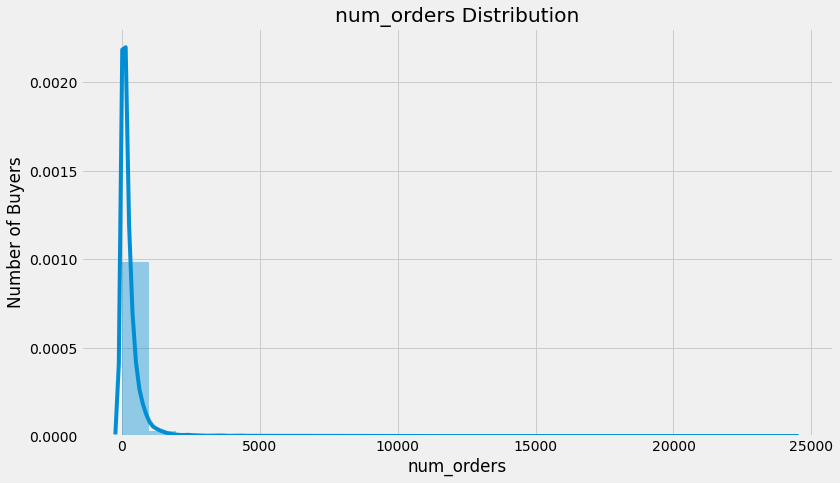

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(trainfinal.num_orders, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

In [21]:
trainfinal2 = trainfinal.drop(['id'], axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'city_code', 'region_code', 'week', 'base_price'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


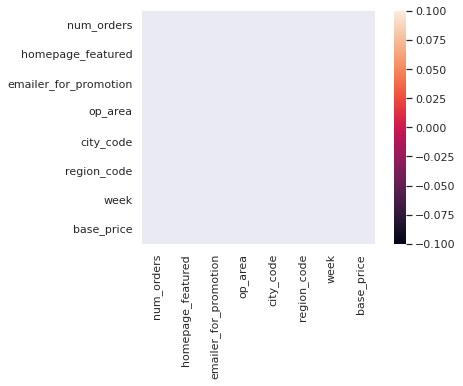

In [22]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0) 
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()


In [23]:
features = columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
X = trainfinal3.values
Y = trainfinal['num_orders'].values
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,city_code,region_code,week,base_price
0,0.0,0.0,2.0,647.0,56.0,1.0,152.29
1,0.0,0.0,2.0,647.0,56.0,2.0,152.29
2,0.0,0.0,2.0,647.0,56.0,3.0,133.92
3,0.0,0.0,2.0,647.0,56.0,4.0,134.86
4,0.0,0.0,2.0,647.0,56.0,5.0,147.50


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25)